In [1]:
import pandas as pd

training_file = pd.read_csv("en-ner-conll-2003/train/train.tsv", sep='\t', on_bad_lines="warn", names=["label","document"])
training_file.head()

label  \
0  B-ORG O B-MISC O O O B-MISC O O O B-PER I-PER ...   
1  O B-PER O O O O O O O O O B-LOC O O O O O O O ...   
2  B-LOC O B-LOC O O O O O O B-LOC O O B-LOC O O ...   
3  B-LOC O O O O B-LOC O O O B-LOC O O B-LOC O O ...   
4  B-MISC O O O O O O O O O O O B-LOC O O B-MISC ...   

                                            document  
0  EU rejects German call to boycott British lamb...  
1  Rare Hendrix song draft sells for almost $ 17,...  
2  China says Taiwan spoils atmosphere for talks ...  
3  China says time right for Taiwan talks . </S> ...  
4  German July car registrations up 14.2 pct yr /...

In [2]:
import tensorflow as tf
training_file["tag_list"] = training_file["label"].apply(lambda x : x.split())
training_file["tokenized"] = training_file["document"].apply(lambda x : x.split())
training_file["len_tags"] = training_file["tag_list"].apply(len)
training_file["len_tokenized"] = training_file["tokenized"].apply(len)

In [3]:
training_file.loc[~(training_file['len_tokenized'] == training_file['len_tags'])]

Empty DataFrame
Columns: [label, document, tag_list, tokenized, len_tags, len_tokenized]
Index: []

In [4]:
training_file.head()

label  \
0  B-ORG O B-MISC O O O B-MISC O O O B-PER I-PER ...   
1  O B-PER O O O O O O O O O B-LOC O O O O O O O ...   
2  B-LOC O B-LOC O O O O O O B-LOC O O B-LOC O O ...   
3  B-LOC O O O O B-LOC O O O B-LOC O O B-LOC O O ...   
4  B-MISC O O O O O O O O O O O B-LOC O O B-MISC ...   

                                            document  \
0  EU rejects German call to boycott British lamb...   
1  Rare Hendrix song draft sells for almost $ 17,...   
2  China says Taiwan spoils atmosphere for talks ...   
3  China says time right for Taiwan talks . </S> ...   
4  German July car registrations up 14.2 pct yr /...   

                                            tag_list  \
0  [B-ORG, O, B-MISC, O, O, O, B-MISC, O, O, O, B...   
1  [O, B-PER, O, O, O, O, O, O, O, O, O, B-LOC, O...   
2  [B-LOC, O, B-LOC, O, O, O, O, O, O, B-LOC, O, ...   
3  [B-LOC, O, O, O, O, B-LOC, O, O, O, B-LOC, O, ...   
4  [B-MISC, O, O, O, O, O, O, O, O, O, O, O, B-LO...   

                                           tokenized  len_tags  len_tokenized  
0  [EU, rejects, German, call, to, boycott, Briti...       489            489  
1  [Rare, Hendrix, song, draft, sells, for, almos...       197            197  
2  [China, says, Taiwan, spoils, atmosphere, for,...       248            248  
3  [China, says, time, right, for, Taiwan, talks,...        80             80  
4  [German, July, car, registrations, up, 14.2, p...       235            235

In [5]:
max_length = training_file["len_tokenized"].max()
print(max_length) # 1532 ---> ~2048

1532


### Testowanie wektoryzacji / dewektoryzacji tekstu

In [6]:
vectorize_layer = tf.keras.layers.TextVectorization(standardize=None)
vectorize_layer.adapt(training_file["document"])
print(vectorize_layer(training_file["document"][20]))

tf.Tensor(
[18792   316  1335   896     8   479  7287   284     3     2 18492     4
 11364     3     2   137     2 18793 18637 20290   346    15    14    68
    27     9  1335  9461    59  3210    42  5299   507     6    52  4906
    71     7    64  1712   554    49   540     3     2    20   132    15
    27   257     5   540     4    60   536   232    18     4    37  1257
    52   234    71  1398  1164     6    64  2541 23235    65   880  5156
   280  3526     3     2    20  5156    40  1257    17    52 22125    71
     3     2  2016 18381     4   449   834  1318     6     5 13472    12
  1339  2356   132     4    15     5  9461    13  1240    42  2542     8
  2525     5   132    16  8166   666   724  1190    12  2129   618   622
  5276    12   836     3    13     2], shape=(126,), dtype=int64)


In [7]:
len(training_file["document"][20].split())

126

In [8]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 '</S>',
 '.',
 ',',
 'the',
 'of',
 'in',
 'to',
 'a',
 ')',
 '(',
 'and',
 '"',
 'on',
 'said',
 "'s",
 'for',
 '1',
 '-',
 'The',
 'was',
 '2',
 '0',
 '3',
 'at',
 'with',
 'that',
 'from',
 'by',
 'is',
 ':',
 'as',
 'he',
 '4',
 'had',
 'has',
 'it',
 'his',
 'not',
 'were',
 'be',
 'an',
 'have',
 'after',
 'who',
 'will',
 '5',
 'but',
 'first',
 'U.S.',
 'been',
 '$',
 '--',
 'two',
 'their',
 'are',
 '6',
 'beat',
 'would',
 'which',
 'up',
 'I',
 'they',
 'its',
 'percent',
 'year',
 'out',
 'Thursday',
 'this',
 'last',
 'million',
 'over',
 'Wednesday',
 'one',
 '7',
 'government',
 'against',
 '/',
 'police',
 'when',
 'second',
 'also',
 'Tuesday',
 'He',
 'It',
 'A',
 'three',
 'told',
 'new',
 '10',
 'Monday',
 'or',
 'about',
 'Friday',
 'people',
 'In',
 'her',
 '9',
 '1996-08-28',
 'no',
 'won',
 'we',
 'New',
 'into',
 'under',
 'some',
 'Sunday',
 'But',
 '8',
 'more',
 'before',
 'week',
 "'",
 'time',
 'than',
 'market',
 'could',
 'Germany',
 'poi

In [9]:
import numpy as np
vocabulary = vectorize_layer.get_vocabulary()
vocab_arr = np.asarray(vocabulary)
" ".join(vocab_arr[vectorize_layer(training_file["document"][20])])

'Kindercare says debt buy to hit Q1 results . </S> MONTGOMERY , Ala . </S> 1996-08-22 </S> KinderCare Learning Centers Inc said on Thursday that a debt buyback would mean an extraordinary loss of $ 1.2 million in its fiscal 1997 first quarter . </S> The company said that during the quarter , which began June 1 , it bought $ 30 million par value of its outstanding 10-3/8 percent senior notes due 2001 . </S> The notes were bought for $ 31.5 million . </S> Philip Maslowe , chief financial officer of the preschool and child care company , said the buyback " offered an opportunity to reduce the company \'s weighted average interest costs and improve future cash flows and earnings . " </S>'

In [10]:
training_file["document"][20]

'Kindercare says debt buy to hit Q1 results . </S> MONTGOMERY , Ala . </S> 1996-08-22 </S> KinderCare Learning Centers Inc said on Thursday that a debt buyback would mean an extraordinary loss of $ 1.2 million in its fiscal 1997 first quarter . </S> The company said that during the quarter , which began June 1 , it bought $ 30 million par value of its outstanding 10-3/8 percent senior notes due 2001 . </S> The notes were bought for $ 31.5 million . </S> Philip Maslowe , chief financial officer of the preschool and child care company , said the buyback " offered an opportunity to reduce the company \'s weighted average interest costs and improve future cash flows and earnings . " </S>'

In [11]:
# Separate vectorizer for input / output

<AxesSubplot:>

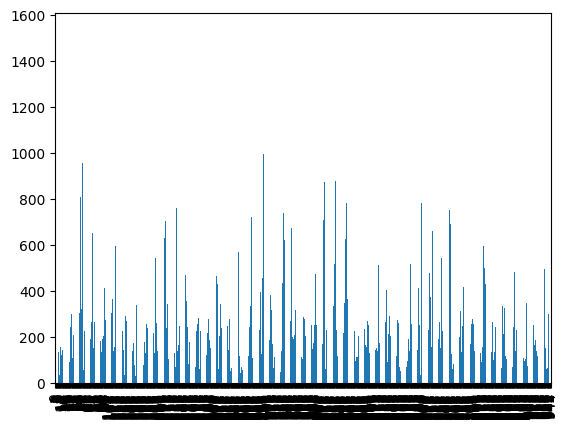

In [12]:
training_file["len_tokenized"].plot.bar()

### Padding przykładów do 2048 słów

In [13]:
sentence_vectorizer = tf.keras.layers.TextVectorization(standardize=None, output_sequence_length=2048)
sentence_vectorizer.adapt(training_file["document"])
print(sentence_vectorizer(training_file["document"][20]))

tf.Tensor([18792   316  1335 ...     0     0     0], shape=(2048,), dtype=int64)


In [14]:
label_vectorizer = tf.keras.layers.TextVectorization(standardize=None, output_sequence_length=2048)
label_vectorizer.adapt(training_file["label"])
print(label_vectorizer(training_file["label"][20]))

tf.Tensor([2 2 2 ... 0 0 0], shape=(2048,), dtype=int64)


In [15]:
tags_list = label_vectorizer.get_vocabulary()
tags_length = label_vectorizer.vocabulary_size()

vocab_list = sentence_vectorizer.get_vocabulary()
vocab_length = sentence_vectorizer.vocabulary_size()

In [16]:
training_file["document_vectorized"] = training_file["document"].apply(sentence_vectorizer)
training_file["label_vectorized"] = training_file["label"].apply(label_vectorizer)

In [79]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
train, valid = train_test_split(training_file, test_size=0.2)
train_x = np.stack(train["document_vectorized"].values)
train_y = np.stack(train["label_vectorized"].values)
train_y = np.array([to_categorical(i,num_classes = tags_length) for i in  train_y])

val_x = np.stack(valid["document_vectorized"].values)
val_y = np.stack(valid["label_vectorized"].values)
val_y = np.array([to_categorical(i,num_classes = tags_length) for i in  val_y])

In [97]:
print(val_x[0])

[2014   19  122 ...    0    0    0]


In [80]:
train_x.shape

(756, 2048)

In [81]:
train_y.shape

(756, 2048, 11)

In [82]:
train_x[0]

array([ 128,   19, 1368, ...,    0,    0,    0], dtype=int64)

In [83]:
train_y[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [122]:
from keras.optimizers import Adam
import keras.layers as layers
import keras


def create_model():
    input_layer = layers.Input(shape=(2048,))
    embedding_layer = layers.Embedding(input_dim = vocab_length+1,output_dim = 128,input_length = 2048)(input_layer)
    lstm_layer = layers.LSTM(256, return_sequences=True)(embedding_layer)
    output_layer = layers.TimeDistributed(layers.Dense(tags_length,activation="softmax"))(lstm_layer)
    #out = layers.Dense(2048,activation="linear")(dropout)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 2048)]            0         
                                                                 
 embedding_15 (Embedding)    (None, 2048, 128)         3024256   
                                                                 
 lstm_20 (LSTM)              (None, 2048, 256)         394240    
                                                                 
 time_distributed_18 (TimeDi  (None, 2048, 11)         2827      
 stributed)                                                      
                                                                 
Total params: 3,421,323
Trainable params: 3,421,323
Non-trainable params: 0
_________________________________________________________________


In [123]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50, callbacks=[callback])

Epoch 1/50
24/24 [==============================] - 29s 1s/step - loss: 0.6602 - accuracy: 0.8703 - val_loss: 0.2673 - val_accuracy: 0.9425
Epoch 2/50
24/24 [==============================] - 27s 1s/step - loss: 0.2500 - accuracy: 0.9653 - val_loss: 0.1613 - val_accuracy: 0.9781
Epoch 3/50
24/24 [==============================] - 28s 1s/step - loss: 0.1062 - accuracy: 0.9790 - val_loss: 0.0984 - val_accuracy: 0.9793
Epoch 4/50
24/24 [==============================] - 28s 1s/step - loss: 0.0920 - accuracy: 0.9806 - val_loss: 0.0936 - val_accuracy: 0.9799
Epoch 5/50
24/24 [==============================] - 28s 1s/step - loss: 0.0874 - accuracy: 0.9812 - val_loss: 0.0901 - val_accuracy: 0.9800
Epoch 6/50
24/24 [==============================] - 27s 1s/step - loss: 0.0828 - accuracy: 0.9816 - val_loss: 0.0867 - val_accuracy: 0.9804
Epoch 7/50
24/24 [==============================] - 27s 1s/step - loss: 0.0774 - accuracy: 0.9818 - val_loss: 0.0805 - val_accuracy: 0.9804
Epoch 8/50
24/24 [==

In [22]:
tag_list_numpy = np.array(tags_list)
def get_tag_from_int(input_integer):
    return tag_list_numpy[input_integer]
def get_ner_output_single_sentence(input_sentence):
    sentence_length = len(input_sentence.split())
    vectorized = sentence_vectorizer(input_sentence)
    #print(vectorized)
    model_output = model(np.stack(tf.expand_dims(vectorized,0)))
    #print(model_output.numpy())
    #print(model_output.shape)
    max_indices = np.argmax(model_output, axis=2).flatten()
    #print(max_indices)
    #print(len(max_indices))
    #" ".join(vocab_arr[vectorize_layer(training_file["document"][20])])
    tokenized = [get_tag_from_int(x) for x in max_indices[:]]
    return tokenized[:sentence_length]
#get_ner_output_single_sentence("China says time right for Taiwan talks . </S> BEIJING 1996-08-22 </S> China has said it was time for political talks with Taiwan and that the rival island should take practical steps towards that goal . </S> Consultations should be held to set the time and format of the talks , the official Xinhua news agency quoted Tang Shubei , executive vice chairman of the Association for Relations Across the Taiwan Straits , as saying late on Wednesday . </S>")

def test_sentence(sentence):
    model_output = get_ner_output_single_sentence(sentence)
    input_tokens = sentence.split()
    return list(zip(input_tokens, model_output))

test_sentence("China says time right for Taiwan talks . </S> BEIJING 1996-08-22 </S> China has said it was time for political talks with Taiwan and that the rival island should take practical steps towards that goal . </S> Consultations should be held to set the time and format of the talks , the official Xinhua news agency quoted Tang Shubei , executive vice chairman of the Association for Relations Across the Taiwan Straits , as saying late on Wednesday . </S>")

[('China', 'B-LOC'),
 ('says', 'O'),
 ('time', 'O'),
 ('right', 'O'),
 ('for', 'O'),
 ('Taiwan', 'B-LOC'),
 ('talks', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('BEIJING', 'B-LOC'),
 ('1996-08-22', 'O'),
 ('</S>', 'O'),
 ('China', 'B-LOC'),
 ('has', 'O'),
 ('said', 'O'),
 ('it', 'O'),
 ('was', 'O'),
 ('time', 'O'),
 ('for', 'O'),
 ('political', 'O'),
 ('talks', 'O'),
 ('with', 'O'),
 ('Taiwan', 'B-LOC'),
 ('and', 'O'),
 ('that', 'O'),
 ('the', 'O'),
 ('rival', 'O'),
 ('island', 'O'),
 ('should', 'O'),
 ('take', 'O'),
 ('practical', 'O'),
 ('steps', 'O'),
 ('towards', 'O'),
 ('that', 'O'),
 ('goal', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('Consultations', 'O'),
 ('should', 'O'),
 ('be', 'O'),
 ('held', 'O'),
 ('to', 'O'),
 ('set', 'O'),
 ('the', 'O'),
 ('time', 'O'),
 ('and', 'O'),
 ('format', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('talks', 'O'),
 (',', 'O'),
 ('the', 'O'),
 ('official', 'O'),
 ('Xinhua', 'B-ORG'),
 ('news', 'O'),
 ('agency', 'O'),
 ('quoted', 'O'),
 ('Tang', 'B-PER'),
 ('Shubei',

In [20]:
test_sentence("SOCCER - LATE GOALS GIVE JAPAN WIN OVER SYRIA . </S> AL-AIN , United Arab Emirates 1996-12-06 </S> Two goals in the last six minutes gave holders Japan an uninspiring 2-1 Asian Cup victory over Syria on Friday . </S> Takuya Takagi headed the winner in the 88th minute of the group C game after goalkeeper Salem Bitar spoiled a mistake-free display by allowing the ball to slip under his body . </S> It was the second Syrian defensive blunder in four minutes . </S> Defender Hassan Abbas rose to intercept a long ball into the area in the 84th minute but only managed to divert it into the top corner of Bitar 's goal . </S> Syria had taken the lead from their first serious attack in the seventh minute . </S> Nader Jokhadar headed a cross from the right by Ammar Awad into the top right corner of Kenichi Shimokawa 's goal . </S> Japan then laid siege to the Syrian penalty area and had a goal disallowed for offside in the 16th minute . </S> A minute later , Bitar produced a good double save , first from Kazuyoshi Miura 's header and then blocked a Takagi follow-up shot . </S> Bitar saved well again from Miura in the 37th minute , parrying away his header from a corner . </S> Japan started the second half brightly but Bitar denied them an equaliser when he dived to his right to save Naoki Soma 's low drive in the 53rd minute . </S> Japan : 19 - Kenichi Shimokawa , 2 - Hiroshige Yanagimoto , 3 - Naoki Soma , 4 - Masami Ihara , 5 - Norio Omura , 6 - Motohiro Yamaguchi , 8 - Masakiyo Maezono ( 7 - Yasuto Honda 71 ) , 9 - Takuya Takagi , 10 - Hiroshi Nanami , 11 - Kazuyoshi Miura , 15 - Hiroaki Morishima ( 14 - Masayuki Okano 75 ) . </S> Syria : 24 - Salem Bitar , 3 - Bachar Srour ; 4 - Hassan Abbas , 5 - Tarek Jabban , 6 - Ammar Awad ( 9 - Louay Taleb 69 ) , 8 - Nihad al-Boushi , 10 - Mohammed Afash , 12 - Ali Dib , 13 - Abdul Latif Helou ( 17 - Ammar Rihawiy 46 ) , 14 - Khaled Zaher ; 16 - Nader Jokhadar . </S>")

tf.Tensor([  128    19 18713 ...     0     0     0], shape=(2048,), dtype=int64)
[[[3.0971142e-03 1.5280694e-03 9.8057139e-01 ... 3.6668889e-03
   1.4106639e-03 3.3225205e-03]
  [2.1369425e-04 1.2225067e-04 9.9616271e-01 ... 1.4002173e-03
   1.0539902e-04 2.7582867e-04]
  [6.3146334e-05 3.8070513e-05 9.9278271e-01 ... 2.4660169e-03
   5.7447112e-05 1.3038449e-04]
  ...
  [9.9999696e-01 1.7784757e-08 2.5151175e-07 ... 1.3794704e-08
   2.6146161e-08 5.0399006e-08]
  [9.9999696e-01 1.7784757e-08 2.5151198e-07 ... 1.3794731e-08
   2.6146161e-08 5.0399006e-08]
  [9.9999696e-01 1.7784757e-08 2.5151175e-07 ... 1.3794704e-08
   2.6146161e-08 5.0399006e-08]]]
(1, 2048, 11)
[2 2 2 ... 0 0 0]
2048


[('SOCCER', 'O'),
 ('-', 'O'),
 ('LATE', 'O'),
 ('GOALS', 'O'),
 ('GIVE', 'O'),
 ('JAPAN', 'O'),
 ('WIN', 'O'),
 ('OVER', 'O'),
 ('SYRIA', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('AL-AIN', 'O'),
 (',', 'O'),
 ('United', 'B-LOC'),
 ('Arab', 'I-LOC'),
 ('Emirates', 'I-LOC'),
 ('1996-12-06', 'O'),
 ('</S>', 'O'),
 ('Two', 'O'),
 ('goals', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('last', 'O'),
 ('six', 'O'),
 ('minutes', 'O'),
 ('gave', 'O'),
 ('holders', 'O'),
 ('Japan', 'B-LOC'),
 ('an', 'O'),
 ('uninspiring', 'O'),
 ('2-1', 'O'),
 ('Asian', 'B-LOC'),
 ('Cup', 'I-MISC'),
 ('victory', 'O'),
 ('over', 'O'),
 ('Syria', 'B-LOC'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('Takuya', 'O'),
 ('Takagi', 'O'),
 ('headed', 'O'),
 ('the', 'O'),
 ('winner', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('88th', 'O'),
 ('minute', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('group', 'O'),
 ('C', 'O'),
 ('game', 'O'),
 ('after', 'O'),
 ('goalkeeper', 'O'),
 ('Salem', 'O'),
 ('Bitar', 'O'),
 ('spoiled', 'O'

In [127]:
news_string = """Mussolini 's granddaughter rejoins far-right party . </S> ROME 1996-12-06 </S> Alessandra Mussolini , the granddaughter of Italy 's Fascist dictator Benito Mussolini , said on Friday she had rejoined the far-right National Alliance ( AN ) party she quit over policy differences last month . </S> " I 've gone back , " she told a radio show shortly after AN leader Gianfranco Fini , who was being interviewed on the programme , said the row had been resolved . </S> " He did n't want to lose me and I did n't want to lose him . " </S> Fini told state radio RAI he met Mussolini thanks to the good offices of Giuseppe Tatarella , AN 's leader in the Chamber of Deputies ( lower house ) , and had overcome their differences . </S> Mussolini , 33 , resigned from the parliamentary party group for what she said were strictly political reasons . </S> The fiery politician , who is also a niece of screen star Sophia Loren , had accused AN leaders of stifling internal party debate . </S> Mussolini , who sits in the Chamber , told La Stampa newspaper last month after quitting AN 's parliamentary party that she was considering joining the neo-fascist Social Movement ( MS-Fiamma ) formed by some of the Duce 's World War Two followers . </S>"""

test_sentence(news_string)

tf.Tensor([ 1 16  1 ...  0  0  0], shape=(2048,), dtype=int64)
[[[9.1573365e-02 8.5647009e-02 1.1034752e-01 ... 8.8930450e-02
   8.8644758e-02 8.9963131e-02]
  [5.5477720e-02 4.6575051e-02 5.2461910e-01 ... 6.4232960e-02
   4.4661559e-02 5.8426060e-02]
  [4.9609054e-02 4.3161135e-02 4.3743923e-01 ... 9.0816177e-02
   4.6578653e-02 5.5895649e-02]
  ...
  [9.9999696e-01 1.7784757e-08 2.5151175e-07 ... 1.3794731e-08
   2.6146161e-08 5.0399006e-08]
  [9.9999696e-01 1.7784757e-08 2.5151198e-07 ... 1.3794731e-08
   2.6146161e-08 5.0399006e-08]
  [9.9999696e-01 1.7784757e-08 2.5151175e-07 ... 1.3794731e-08
   2.6146161e-08 5.0399006e-08]]]
(1, 2048, 11)
[2 2 2 ... 0 0 0]
2048


[('Mussolini', 'O'),
 ("'s", 'O'),
 ('granddaughter', 'O'),
 ('rejoins', 'O'),
 ('far-right', 'O'),
 ('party', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('ROME', 'B-LOC'),
 ('1996-12-06', 'O'),
 ('</S>', 'O'),
 ('Alessandra', 'O'),
 ('Mussolini', 'O'),
 (',', 'O'),
 ('the', 'O'),
 ('granddaughter', 'O'),
 ('of', 'O'),
 ('Italy', 'B-LOC'),
 ("'s", 'O'),
 ('Fascist', 'O'),
 ('dictator', 'O'),
 ('Benito', 'B-PER'),
 ('Mussolini', 'I-PER'),
 (',', 'O'),
 ('said', 'O'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('she', 'O'),
 ('had', 'O'),
 ('rejoined', 'O'),
 ('the', 'O'),
 ('far-right', 'O'),
 ('National', 'B-PER'),
 ('Alliance', 'I-PER'),
 ('(', 'O'),
 ('AN', 'O'),
 (')', 'O'),
 ('party', 'O'),
 ('she', 'O'),
 ('quit', 'O'),
 ('over', 'O'),
 ('policy', 'O'),
 ('differences', 'O'),
 ('last', 'O'),
 ('month', 'O'),
 ('.', 'O'),
 ('</S>', 'O'),
 ('"', 'O'),
 ('I', 'O'),
 ("'ve", 'O'),
 ('gone', 'O'),
 ('back', 'O'),
 (',', 'O'),
 ('"', 'O'),
 ('she', 'O'),
 ('told', 'O'),
 ('a', 'O'),
 ('radio', 'O'),
 ('

In [126]:
model.save("model_v2.keras")

In [18]:
import keras
model = keras.models.load_model('model_v2.keras')

In [24]:
with open("en-ner-conll-2003/dev-0/in.tsv", "r", encoding="utf-8") as f:
    lines = f.readlines()
processed = [" ".join(get_ner_output_single_sentence(x)) for x in lines if len(x.strip())>0]
with open('en-ner-conll-2003/dev-0/out.tsv', 'w',encoding="utf-8") as f:
    for line in processed:
        f.write(f"{line}\n")

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Adrian\miniconda3\lib\site-packages\keras\backend.py", line 5130, in <genexpr>
    ta.write(ta_index_to_write, out)  File "C:\Users\Adrian\miniconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


In [25]:
with open("en-ner-conll-2003/test-A/in.tsv", "r", encoding="utf-8") as f:
    lines = f.readlines()
processed = [" ".join(get_ner_output_single_sentence(x)) for x in lines if len(x.strip())>0]
with open('en-ner-conll-2003/test-A/out.tsv', 'w',encoding="utf-8") as f:
    for line in processed:
        f.write(f"{line}\n")

### Czyszczenie tagów

In [3]:
tag_set = set()
with open("en-ner-conll-2003/dev-0/out.tsv", "r", encoding="utf-8") as f:
    lines = f.readlines()
for line in lines:
    line_split = line.split()
    for tag in line_split:
        if tag not in tag_set:
            tag_set.add(tag)
print(tag_set)

{'B-LOC', 'I-LOC', 'O', 'I-MISC', 'B-ORG', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC'}


In [5]:
inter_to_begin_mapping = {
    "I-LOC": "B-LOC",
    "I-MISC": 'B-MISC',
    'I-ORG': 'B-ORG',
    'I-PER': 'B-PER'
}
begin_to_inter_mapping = {v: k for k, v in inter_to_begin_mapping.items()}

In [6]:
inter_to_begin_mapping

{'I-LOC': 'B-LOC', 'I-MISC': 'B-MISC', 'I-ORG': 'B-ORG', 'I-PER': 'B-PER'}

In [7]:
begin_to_inter_mapping

{'B-LOC': 'I-LOC', 'B-MISC': 'I-MISC', 'B-ORG': 'I-ORG', 'B-PER': 'I-PER'}

In [9]:
def fix_tags_in_file(filename, filename_fixed):
    lines_fixed = []
    with open(filename, "r", encoding="utf-8") as f:
        lines = f.readlines()
    lines_tokenized = [line.split() for line in lines]
    for line in lines_tokenized:
        line_fixed = []
        for counter, element in enumerate(line):
            if element=="O": # O tag can be placed anywhere
                line_fixed.append(element)
            elif element in inter_to_begin_mapping:
                if counter==0: # Beginning of line, can't check previous tag
                    line_fixed.append(inter_to_begin_mapping[element])
                else:
                    previous_element = line_fixed[counter-1]
                    if previous_element==element or previous_element==inter_to_begin_mapping[element]: # Tag was compatible (same inters or compatible B-->I)
                        line_fixed.append(element)
                    elif previous_element=="O": # O--> Inter
                        line_fixed.append(inter_to_begin_mapping[element])
                    elif previous_element in inter_to_begin_mapping and element in inter_to_begin_mapping and previous_element!=element: # Incompatible subsequent inter-tags
                        line_fixed.append(previous_element)
                    else: # Begin --> Incompatible inter
                        corrected_tag = begin_to_inter_mapping[previous_element]
                        line_fixed.append(corrected_tag)
            elif element in begin_to_inter_mapping: # Beginning tag can be added safely
                line_fixed.append(element)
            else:
                print("This shouldn't happen")
        lines_fixed.append(" ".join(line_fixed))
    with open(filename_fixed, "w", encoding="utf-8") as f:
       for line in lines_fixed:
           f.write(f"{line}\n")
fix_tags_in_file("en-ner-conll-2003/test-A/out.tsv", "en-ner-conll-2003/test-A/out_fixed.tsv")

In [10]:
fix_tags_in_file("en-ner-conll-2003/dev-0/out.tsv", "en-ner-conll-2003/dev-0/out_fixed.tsv")